# Visualizing Neural network approximations to functions

## Solving the problem with linear regression on polynomial features

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
# Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Auxiliary functions

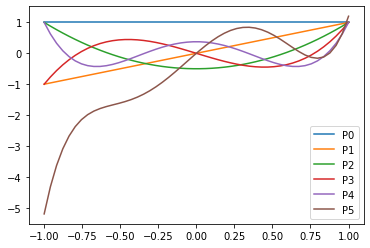

In [ ]:
def Legendre_polynomials(n):
    a = 1
    b = 0
    c = 0
    if n==0:
            return lambda x: np.ones(len(x)) + c
    elif n==1:
            return lambda x: x + c
    elif n==2:
            return lambda x: (1/2)*(3*(x-b)**2-1) + c
    elif n==3:
            return lambda x: (1/2)*(5*(x-b)**3-3*x) + c
    elif n==4:
            return lambda x: (1/8)*(35*(a*x-b)**4-30*(a*x-b)**2+3) + c
    elif n==5:
            return lambda x: 1.2*(1/8)*(63*x**5-70*x**3+15*x) + 2*x - 2*x**2
    elif n==6:
            return lambda x: (1/16)*(231*x**6-315*x**4+105*x**2-5) + c
    elif n==7:
            return lambda x: (1/16)*(429*x**7-693*x**5+315*x**3-35*x) + c
    elif n==8:
            return lambda x: (1/128)*(6435*x**8-12012*x**6+6930*x**4-1260*x**2+35) + c
    elif n==9:
            return lambda x: (1/128)*(12155*x**9-25740*x**7+18018*x**5-4620*x**3+315*x) + c
    elif n==10:
            return lambda x: (1/256)*(46189*x**10-109395*x**8+90090*x**6-30030*x**4+3465*x**2-63) + c
    else:
        raise ValueError(f'n must be leq than 10')

def GaussianNoise(mu=0,sigma=0.5):
    return lambda x: np.random.normal(mu, sigma,len(x))
            
def function(base,noise):
    return lambda x: base(x) + noise(x)
    
N = 5

x = np.linspace(-1,1,num=50)
for n in range(N+1):
    P = Legendre_polynomials(n)
    plt.plot(x,P(x),label = f'P{n}')
plt.legend();

### Ploting the original function

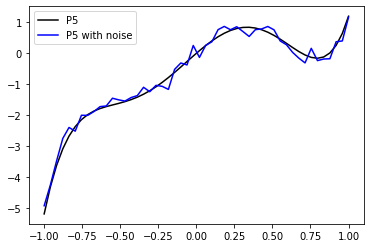

In [ ]:
np.random.seed(0) # Set seed for numpy

mu = 0.
sigma = 0.15

func = function(Legendre_polynomials(N),GaussianNoise(mu,sigma))
plt.plot(x,Legendre_polynomials(N)(x),label = f'P{N}',color='black')
plt.plot(x,func(x), label = f'P{N} with noise', color='blue')
plt.legend();

### Sampling training and test data

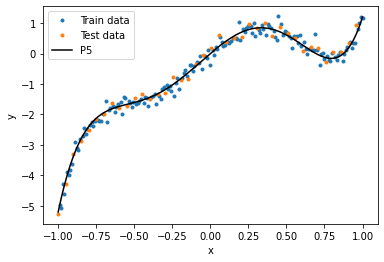

In [ ]:
np.random.seed(2)

n_data_points = 200

# Generate training points
x = np.linspace(-1, 1, num=n_data_points)
y = func(x)

# Split training and test set
mask = (np.arange(len(x)) % 5) >0 # 20% test set
x_train = x[mask]
x_test = x[~mask]
y_train = y[mask] 
y_test = y[~mask]

# Sort values for plotting
sort_train = np.argsort(x_train)
x_train = x_train[sort_train]
y_train = y_train[sort_train]

sort_test = np.argsort(x_test)
x_test = x_test[sort_test]
y_test = y_test[sort_test]

Test_MSE = dict()

poly_features = PolynomialFeatures(degree=10)

# Extend data with colums with th new features
x_train_poly = poly_features.fit_transform(x_train.reshape(-1,1))
x_test_poly = poly_features.fit_transform(x_test.reshape(-1,1))

plt.plot(x_train, y_train, '.', markersize=6, label = 'Train data')
plt.plot(x_test, y_test, '.', markersize=6, label = 'Test data')
plt.plot(x,P(x),label = f'P{n}',color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Solutions

prediction =  -0.664x^0
Loss: 1.891
Test Mean Square Error: 2.186 

prediction =  -0.674x^0 + 2.03x^1
Loss: 0.5093
Test Mean Square Error: 0.6028 

prediction =  -0.0155x^0 + 2.05x^1 + -1.96x^2
Loss: 0.1624
Test Mean Square Error: 0.168 

prediction =  -0.0153x^0 + 2x^1 + -1.96x^2 + 0.0764x^3
Loss: 0.1622
Test Mean Square Error: 0.1668 

prediction =  -0.00877x^0 + 2x^1 + -2.02x^2 + 0.0749x^3 + 0.0749x^4
Loss: 0.1622
Test Mean Square Error: 0.1676 

prediction =  -0.0203x^0 + 4.28x^1 + -1.86x^2 + -10.5x^3 + -0.162x^4 + 9.44x^5
Loss: 0.02659
Test Mean Square Error: 0.02293 

prediction =  -0.0176x^0 + 4.29x^1 + -1.92x^2 + -10.5x^3 + 0.00488x^4 + 9.45x^5 + -0.122x^6
Loss: 0.02658
Test Mean Square Error: 0.02289 



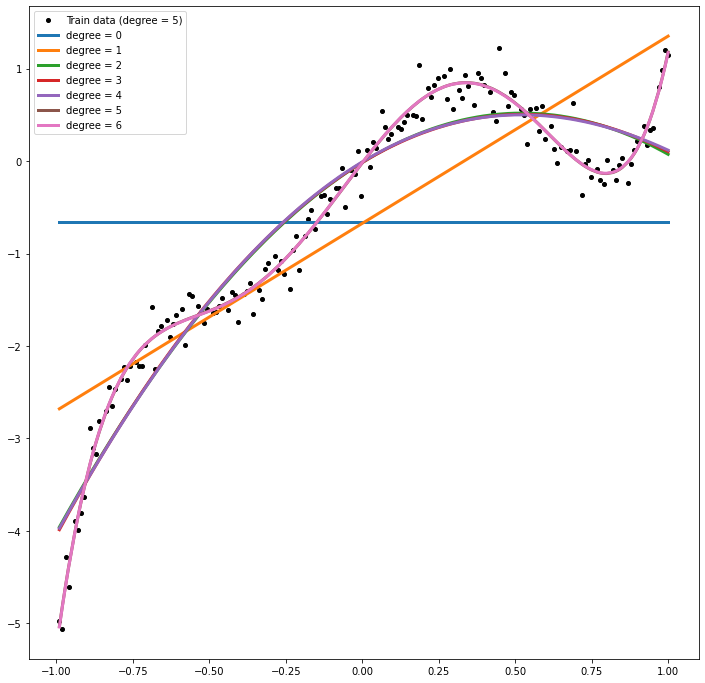

In [ ]:
plt.figure(figsize=(12,12))

plt.plot(x_train,y_train,label=f'Train data (degree = {N})',color='black', 
         marker='o', linestyle='dashed',linewidth=0,markersize=4)

for d in range(N+2):
    linear_model = LinearRegression(fit_intercept=False)
    linear_model = linear_model.fit(x_train_poly[:,:d+1].reshape(-1,d+1), y_train)
    
    result = 'prediction = '
    for n,c in enumerate(linear_model.coef_):
        result = result + f' {linear_model.coef_[n]:.3g}x^{n} +'
    print(result[:-2].format(linear_model.coef_))

    y_pred_train = linear_model.predict(x_train_poly[:,:d+1].reshape(-1,d+1))
    loss = mean_squared_error(y_train,y_pred_train)
    print(f'Loss: {loss:.4g}')

    y_pred_test = linear_model.predict(x_test_poly[:,:d+1].reshape(-1,d+1))
    test_MSE = mean_squared_error(y_test,y_pred_test)

    Test_MSE['Linear ' + str(d)] = test_MSE
    print(f'Test Mean Square Error: {test_MSE:.4g} \n')

    y_pred = linear_model.predict(x_train_poly[:,:d+1].reshape(-1,d+1))
    plt.plot(x_train,y_pred,label=f'degree = {d}', linewidth=3)
plt.legend()
plt.show()

No overfitting with order 6 due to the high number of data points

## Solving the problem with a Neural Network

### Common parameters for all models

In [ ]:
ini = 'he_uniform'

ini1 = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
ini_bias1 = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)

ini2 = tf.random_normal_initializer(mean=0.3, stddev=0.05)
ini_bias2 = tf.random_uniform_initializer(minval=0.5, maxval=1)

loss = 'mse'

# optimizer = tf.keras.optimizers.SGD(lr=1e-1)
# optimizer = tf.keras.optimizers.RMSprop(lr=1e-4)
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

cb_earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='mse', min_delta=0.0005, patience=50, verbose=True, mode='auto',
    baseline=None, restore_best_weights=True
)
verbose = 0
epochs = 500

### Model with a single node: Recover (unique) linear solution

In [ ]:
model0 = tf.keras.Sequential([
         tf.keras.layers.Dense(1, activation='linear', name='fc1', input_dim=1)
            ])
model0.summary()

model0.compile(optimizer=optimizer,
                   loss=loss,
                   metrics=['mse'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


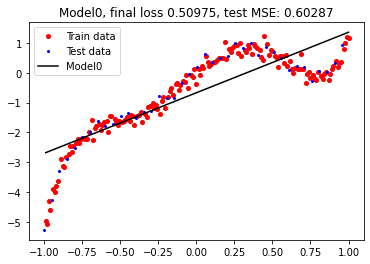

In [ ]:
history0 = model0.fit(x_train.reshape(-1,1), y_train.reshape(-1,1),
                      epochs=epochs,
                      batch_size=round(x_train.shape[0]/50),
                      verbose=verbose)
    
y_pred = model0.predict(x_train.reshape(-1,1))
    
plt.plot(x_train,y_train,label = 'Train data',color='red', 
         marker='o', linestyle='dashed',linewidth=0,markersize=4)
plt.plot(x_test, y_test, '.', markersize=4, color='blue', label = 'Test data')
plt.plot(x_train,y_pred,label = 'Model0', c='k')

final_loss = history0.history['loss'][-1]
y_test_pred = model0.predict(x_test)
test_MSE = mean_squared_error(y_test,y_test_pred)
plt.title(f'Model0, final loss {final_loss:.5g}, test MSE: {test_MSE:.5g}')
plt.legend();

In [ ]:
Test_MSE['Model0'] = test_MSE

In [ ]:
# parameters of the resulting fit
a = model0.get_weights()[0][0,0]
b = model0.get_weights()[1][0]

In [ ]:
print(f'prediction = {b:.3g} + {a:.3g}x')
print(f'Test Mean Square Error: {test_MSE:.4g}')

prediction = -0.673 + 2.03x
Test Mean Square Error: 0.6029


#### Plotting the loss surface

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

def f(m,b):
    yhat = x_train*m+b
    return np.mean((y_train - yhat) ** 2)

mmin,mmax,bmin,bmax = 1.5,3,-1.2,0

nm = 300
nb = 300
u = np.linspace(mmin, mmax, nm) 
v = np.linspace(bmin, bmax, nb)

xx = np.zeros((nm,nb),dtype='d')
yy = np.zeros((nm,nb),dtype='d')
zz = np.zeros((nm,nb),dtype='d')

# populate x,y,z arrays
for i in range(nm):
    for j in range(nb):
        xx[i,j] = u[i]
        yy[i,j] = v[j]
        zz[i,j] = min(f(xx[i,j],yy[i,j]),3)

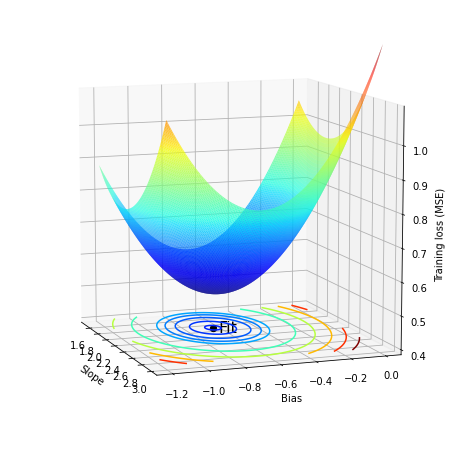

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

# Plot the 3D surface
ax.plot_surface(xx, yy, zz, rstride=2, cstride=2, alpha=0.8,cmap=cm.jet)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
cset = ax.contour(xx, yy, zz, zdir='MSE', offset=0.4, cmap=cm.jet, levels=[0.4,0.45,0.475,0.5,0.51125,0.525,0.55,0.575,0.6,0.7,0.8,0.9,1.0,1.1])

#ax.set_xlim(mmin, mmax)
#ax.xaxis.set_ticks(np.arange(mmin, mmax, 0.25))

#ax.set_ylim(bmin, bmax)
#ax.yaxis.set_ticks(np.arange(bmin, bmax, 0.25))

ax.set_zlim(0.5, 1.1)
ax.zaxis.set_ticks(np.arange(0.4, 1.1, 0.1))

ax.set_xlabel('Slope')
ax.set_ylabel('Bias')
ax.set_zlabel('Training loss (MSE)')

ax.view_init(elev=10., azim=-20)

# Obtained solution
ax.scatter(a, b, zs=0.40, zdir='z', c='k', s=40, marker = 'o')
ax.text(1.08*a, 1.02*b, 0.40, s='Fit', fontsize=16)
plt.show()

### Model with one hidden layer with a single node

loss =  0.5100175142288208, seed = 24878946


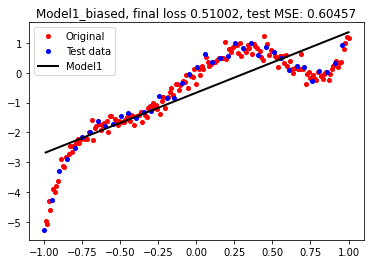

In [ ]:
while True:
  nn = 1
  seed = np.random.randint(0,1e8)
  tf.random.set_seed(seed)

  optimizer1 = tf.keras.optimizers.Adam(lr=1e-3)

  model1 = tf.keras.Sequential([
      tf.keras.layers.Dense(nn, activation='relu', name='fc1', input_dim=1, 
                            kernel_initializer = ini2),
      tf.keras.layers.Dense(1)
                      ])

  model1.compile(optimizer=optimizer,
              loss=loss,
              metrics=['mse'])

  history1 = model1.fit(x_train.reshape(-1,1), y_train.reshape(-1,1),
                epochs=epochs,
                callbacks=[],
                batch_size=round(x_train.shape[0]/20),
                verbose=verbose)

  y_pred = model1.predict(x_train.reshape(-1,1))
  final_loss = history1.history['loss'][-1]
  print(f'loss =  {final_loss}, seed = {seed}')

  if final_loss < 0.8:
      y_pred = model1.predict(x_train.reshape(-1,1))

      y_test_pred = model1.predict(x_test)
      test_MSE = mean_squared_error(y_test,y_test_pred)

      plt.title(f'Model1_biased, final loss {final_loss:.5g}, test MSE: {test_MSE:.5g}')
      plt.plot(x_train,y_train,label = 'Original',color='red', 
              marker='o', linestyle='dashed', linewidth=0, markersize=4)
      plt.plot(x_test,y_test,label = 'Test data',color='b', 
              marker='o', linestyle='dashed', linewidth=0, markersize=4)

      plt.plot(x_train,y_pred,label = 'Model1', c ='k',linewidth=2)
      plt.legend();

      break

The resulting fit is still a linear approximation. Even though the model is able to represent a single ReLU function, it chose not to use it since it would't not result in a lower loss.

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 1)                 2         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Test_MSE['Model1'] = test_MSE
# Error is much lower 
# Remember that this is Mean square error, so that the values are
# comparable even though the points are different

### Model with one hidden layer with 2 nodes.

#### Separately scale the input and output variables

In [ ]:
print(x_train.min(), x_train.max(), y_train.min(), y_train.max())

scale_x = MinMaxScaler()
x_train_scaled = scale_x.fit_transform(x_train.reshape(-1,1))
scale_y = MinMaxScaler()
y_train_scaled = scale_y.fit_transform(y_train.reshape(-1,1))

x_test_scaled = scale_x.transform(x_test.reshape(-1,1))  # Note: not fit_transform
y_test_scaled = scale_y.transform(y_test.reshape(-1,1))  # Note: not fit_transform

print(x_train_scaled.min(), x_train_scaled.max(), y_train_scaled.min(), y_train_scaled.max())

-0.9899497487437185 1.0 -5.063604817585751 1.2224737600314832
0.0 0.9999999999999999 0.0 1.0


#### Shuffling of the data scaling

We create a dataset object to feed it to the model. It is important to shuffle the data since it was created in a very strict order which could introduce
biases in the training of the model.
Also relevant is the fact that batch size should be less than the length whole dataset. Even though it is possible to run a full gradient on the whole dataset due to the small size of the problem, it is usually less efficient than stochastic gradient descent (it doesn't take advantage of data redundancy) and it can get stuck in worse local minima.

In [ ]:
# Batch size is really important! Full GD fails to find a good minimum and SGD
# usually works faster and finds a better minimum
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train_scaled))
train_dataset = train_dataset.shuffle(buffer_size=80).batch(20)

#    test_dataset = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test_scaled))
#    test_dataset = test_dataset.batch(20)

loss =  0.01297428272664547, seed = 83276171
loss =  0.013438242487609386, seed = 94746231
loss =  0.003910772502422333, seed = 1758485


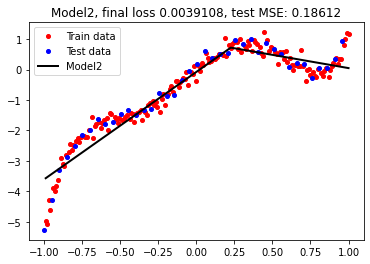

In [ ]:
# This model includes previous model, so minimum should be lower. However, depends on training
while True: # Loop over different seeds
    nn = 2
    seed = np.random.randint(0,1e8)
    tf.random.set_seed(seed)    

    model2 = tf.keras.Sequential([
                tf.keras.layers.Dense(nn, activation='relu', name='fc1', input_dim=1, 
                                      kernel_initializer = ini,
                                      bias_initializer=ini_bias2),
                tf.keras.layers.Dense(1, activation='linear', name='fc2', 
                                      kernel_initializer = ini,
                                      bias_initializer=ini_bias2),
                ])

    model2.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-2),
                       loss=loss,
                       metrics=['mse'])

    history2 = model2.fit(train_dataset,
                          epochs=epochs,
                          callbacks=[],#[cb_earlystop],
                          verbose=verbose)

    # batch size is really important! Full GD fails to find better minimum
    final_loss = history2.history['loss'][-1]
    print(f'loss =  {final_loss}, seed = {seed}')
    
    if final_loss < 0.01: # Stop when a good solution is found
        
        y_pred_scaled = model2.predict(x_train_scaled)
        y_test_scaled = model2.predict(x_test_scaled)

        # Reverse the scaling
        y_plot_pred = scale_y.inverse_transform(y_pred_scaled)
        y_test_pred = scale_y.inverse_transform(y_test_scaled)

        test_MSE = mean_squared_error(y_test,y_test_pred)

        plt.title(f'Model2, final loss {final_loss:.5g}, test MSE: {test_MSE:.5g}')
        plt.plot(x_train,y_train,label = 'Train data',color='red', 
                marker='o', linestyle='dashed', linewidth=0, markersize=4)
        plt.plot(x_test,y_test,label = 'Test data',color='b', 
                marker='o', linestyle='dashed', linewidth=0, markersize=4)

        plt.plot(x_train,y_plot_pred,label = 'Model2', c ='k', linewidth=2)
        plt.legend()

        break

The neural net correctly places the two ReLU function that it can represent to better approximate the left side, which minimizes MSE. The right side is fit using a constant approximation,since thereareno more ReLU components available to produce a better fit.

In [ ]:
model2.summary()
model2.get_weights()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 2)                 4         
_________________________________________________________________
fc2 (Dense)                  (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


[array([[-0.35496104, -1.496219  ]], dtype=float32),
 array([0.68805945, 0.9145586 ], dtype=float32),
 array([[ 0.77480304],
        [-0.92910707]], dtype=float32),
 array([0.5547905], dtype=float32)]

In [ ]:
Test_MSE['Model2'] = test_MSE

Even though it is clear that a better choice for the second ReLU is possible, the minimization algorithm is unable to find it and gets stuck in a local minima
of the loss function

### Model with one hidden layer with 3 nodes

loss =  0.0035021912772208452, seed = 14854524
loss =  0.007265281863510609, seed = 40718025
loss =  0.0022360843140631914, seed = 21042088
loss =  0.00387331354431808, seed = 50401775
loss =  0.003789188340306282, seed = 69220106
loss =  0.0030495747923851013, seed = 18694340
loss =  0.002209431491792202, seed = 38628070
loss =  0.0036999720614403486, seed = 1087757
loss =  0.0037510297261178493, seed = 52979486
loss =  0.005588548257946968, seed = 71203282
loss =  0.003914353437721729, seed = 83299543
loss =  0.003584288526326418, seed = 21535962
loss =  0.0037661560345441103, seed = 29549713
loss =  0.0036979466676712036, seed = 3356031
loss =  0.004845025483518839, seed = 68608933
loss =  0.004100032616406679, seed = 21876294
loss =  0.003771181683987379, seed = 49750585
loss =  0.003810099558904767, seed = 65553022
loss =  0.00332515686750412, seed = 68441629
loss =  0.0037471852265298367, seed = 83641007
loss =  0.003834684146568179, seed = 20621496
loss =  0.0035831439308822155,

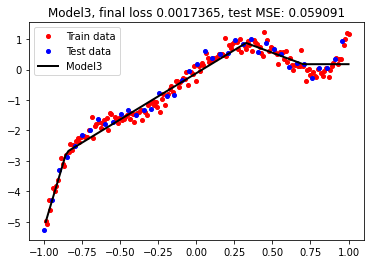

In [ ]:
while True: # Loop over different seeds
    nn = 3
    seed = np.random.randint(0,1e8)
    tf.random.set_seed(seed)    

    model3 = tf.keras.Sequential([
                tf.keras.layers.Dense(nn, activation='relu', name='fc1', input_dim=1, 
                                      kernel_initializer = ini,
                                      bias_initializer=ini_bias2),
                tf.keras.layers.Dense(1, activation='linear', name='out', 
                                      kernel_initializer = ini,
                                      bias_initializer=ini_bias2),
                ])

    model3.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-2),
                       loss=loss,
                       metrics=['mse'])

    history3 = model3.fit(train_dataset,
                          epochs=2*epochs,
                          callbacks=[],
                          verbose=verbose)


    final_loss = history3.history['loss'][-1]
    print(f'loss =  {final_loss}, seed = {seed}')
    
    if final_loss < 0.002: # Stop when a good solution is found
        
        y_pred_scaled = model3.predict(x_train_scaled)
        y_test_scaled = model3.predict(x_test_scaled)

        # Reverse the scaling
        y_plot_pred = scale_y.inverse_transform(y_pred_scaled)
        y_test_pred = scale_y.inverse_transform(y_test_scaled)

        test_MSE = mean_squared_error(y_test,y_test_pred)

        plt.title(f'Model3, final loss {final_loss:.5g}, test MSE: {test_MSE:.5g}')
        plt.plot(x_train,y_train,label = 'Train data',color='red', 
                marker='o', linestyle='dashed', linewidth=0, markersize=4)
        plt.plot(x_test,y_test,label = 'Test data',color='b', 
                marker='o', linestyle='dashed', linewidth=0, markersize=4)

        plt.plot(x_train,y_plot_pred,label = 'Model3', c ='k', linewidth=2)
        plt.legend()

        break

In [ ]:
Test_MSE['Model3'] = test_MSE

### Models of increasing sizes

loss =  0.0021695431787520647, seed = 35555018
loss =  0.00148802122566849, seed = 71822705
loss =  0.0012548040831461549, seed = 88267135
loss =  0.0010060156928375363, seed = 53241192
loss =  0.0009203236550092697, seed = 46042126
loss =  0.0009339964017271996, seed = 14431301
loss =  0.0009881174191832542, seed = 77288923
loss =  0.0010278705740347505, seed = 64665605


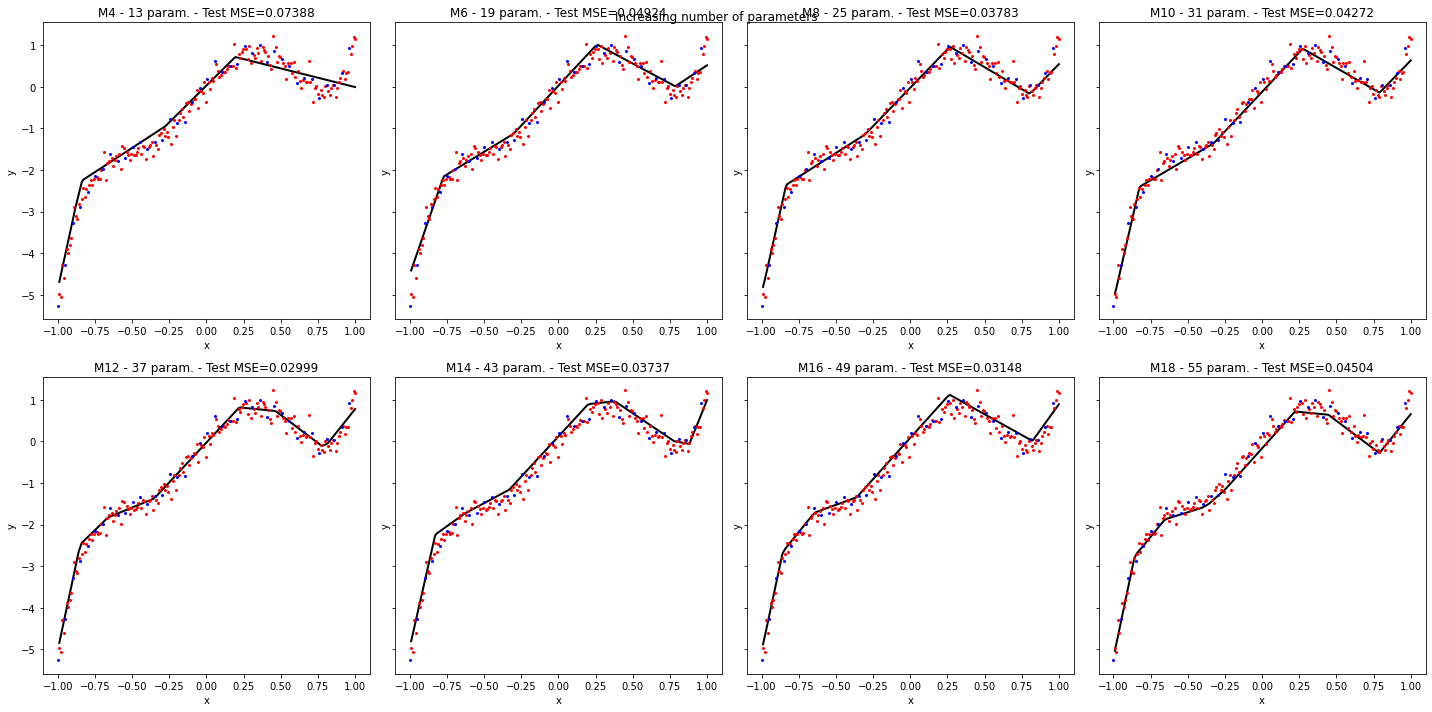

In [ ]:
nmodels = 8

stats = dict()
stats['Nparam']=[]
stats['Loss']=[]
stats['Test_MSE']=[]
stats['Curves']=[]

ncols = 4
nrows = round(nmodels // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharey=True)
axes_list = [item for sublist in axes for item in sublist] 

fig.subplots_adjust(hspace=0.5)
fig.suptitle('Increasing number of parameters')

for nn in range(0,nmodels):
    seed = np.random.randint(0,1e8)
    tf.random.set_seed(seed)    

    n = 2*nn + 4

    model = tf.keras.Sequential([
                tf.keras.layers.Dense(n, activation='relu', name='fc1', input_dim=1, 
                                      kernel_initializer = ini,
                                      bias_initializer=ini_bias2),
                tf.keras.layers.Dense(1, activation='linear', name='out', 
                                      kernel_initializer = ini,
                                      bias_initializer=ini_bias2),
                ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-2),
                       loss=loss,
                       metrics=['mse'])

    history = model.fit(train_dataset,
                        epochs=4*epochs,
                        callbacks=[],#[cb_earlystop],
                        verbose=verbose, 
                        shuffle=True)

    final_loss = history.history['loss'][-1]
    print(f'loss =  {final_loss}, seed = {seed}')
    
        
    y_pred_scaled = model.predict(x_train_scaled)
    y_test_scaled = model.predict(x_test_scaled)

    # Reverse the scaling
    y_plot_pred = scale_y.inverse_transform(y_pred_scaled)
    y_test_pred = scale_y.inverse_transform(y_test_scaled)

    test_MSE = mean_squared_error(y_test,y_test_pred)

    ax = axes_list[nn]
    ax.set_xlabel('x', size=10)
    ax.set_ylabel('y', size=10)
    
    stats['Nparam'].append(model.count_params())
    stats['Loss'].append(final_loss)
    stats['Test_MSE'].append(test_MSE)
    stats['Curves'].append(y_plot_pred)

    s = 'M'+ str(n) + ' - ' + str(model.count_params()) + ' param. - Test MSE=' + "{:.5f}".format(test_MSE)
    ax.set_title(s)
    ax.plot(x_train, y_plot_pred, c ='k', linewidth=2)

    ax.plot(x_train, y_train, label = 'Train data',color='red', 
                marker='o', linestyle='dashed', linewidth=0, markersize=2)
    
    ax.plot(x_test,y_test,label = 'Test data',color='b', 
                marker='o', linestyle='dashed', linewidth=0, markersize=2)
    
fig.tight_layout()

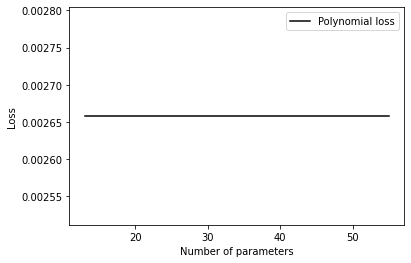

In [ ]:
###@plt.plot(stats['Nparam'],stats['Loss'], label='Loss', color='red')
plt.plot(stats['Nparam'],0.002658*np.ones_like(stats['Nparam']),label='Polynomial loss', color='black')
plt.xlabel('Number of parameters')
plt.ylabel('Loss')
plt.legend()

The nets are starting to overfit the data

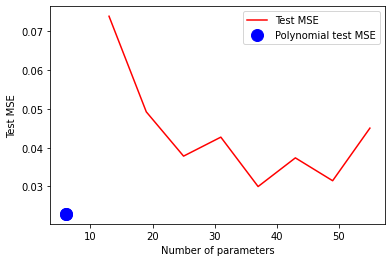

In [ ]:
plt.plot(stats['Nparam'],stats['Test_MSE'], label='Test MSE', color='red')
plt.plot([6,6.1],[0.02293,0.023],'bo', linewidth=2, markersize=12,label='Polynomial test MSE')
plt.xlabel('Number of parameters')
plt.ylabel('Test MSE')
plt.legend()

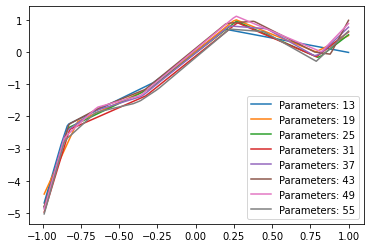

In [ ]:
for i in range(len(stats['Curves'])):
  plt.plot(x_train,stats['Curves'][i], label='Parameters: ' + str(stats['Nparam'][i]))
plt.legend()

## Try other activations just for fun

loss =  0.537692129611969, seed = 21133871
loss =  0.0009802038548514247, seed = 43221065
loss =  0.0009030528599396348, seed = 35059954
loss =  0.0010629667667672038, seed = 44026868
loss =  0.0022300758864730597, seed = 77983308
loss =  0.002180134877562523, seed = 4982625
loss =  0.0021638802718371153, seed = 83410257
loss =  0.04802733287215233, seed = 5510082


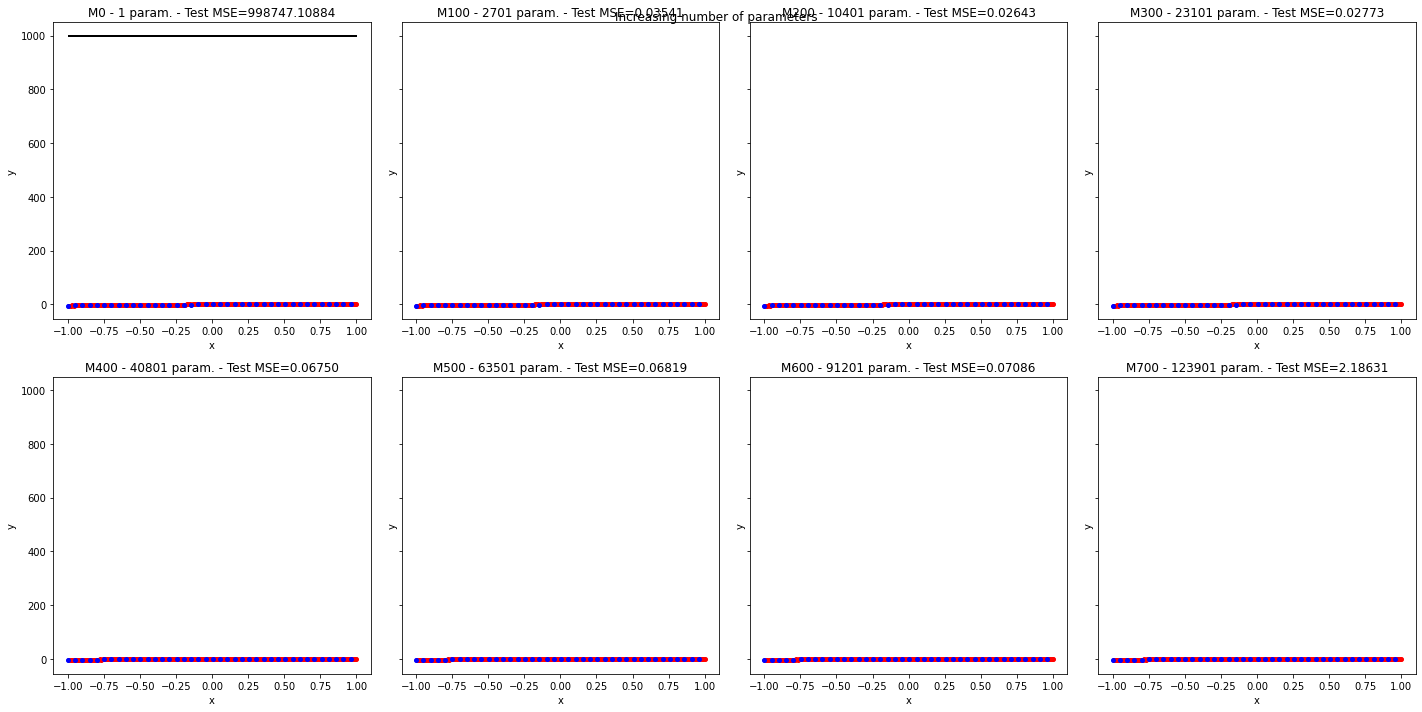

In [ ]:
nmodels = 4

stats = dict()
stats['Nparam']=[]
stats['Loss']=[]
stats['Test_MSE']=[]

ncols = 2
nrows = round(nmodels // ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharey=True)
axes_list = [item for sublist in axes for item in sublist] 

fig.subplots_adjust(hspace=0.5)
fig.suptitle('Increasing number of parameters')

for nn in range(0,nmodels):
    seed = np.random.randint(0,1e8)
    tf.random.set_seed(seed)    

    n = 100*nn

    model = tf.keras.Sequential([
                tf.keras.layers.Dense(n/2, activation='relu', name='fc1', input_dim=1, 
                                      kernel_initializer = ini,
                                      bias_initializer=ini_bias2),
                tf.keras.layers.Dense(n/2, activation='relu', name='fc2', input_dim=n/2, 
                                      kernel_initializer = ini,
                                      bias_initializer=ini_bias2),
                tf.keras.layers.Dense(1, activation='linear', name='out', 
                                      kernel_initializer = ini,
                                      bias_initializer=ini_bias2),
                ])

    model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-2),
                       loss=loss,
                       metrics=['mse'])

    history = model.fit(train_dataset,
                        epochs=4*epochs,
                        callbacks=[],
                        verbose=verbose, 
                        shuffle=True)

    final_loss = history.history['loss'][-1]
    print(f'loss =  {final_loss}, seed = {seed}')
    
        
    y_pred_scaled = model.predict(x_train_scaled)
    y_test_scaled = model.predict(x_test_scaled)

    # Reverse the scaling
    y_plot_pred = scale_y.inverse_transform(y_pred_scaled)
    y_test_pred = scale_y.inverse_transform(y_test_scaled)

    test_MSE = mean_squared_error(y_test,y_test_pred)

    ax = axes_list[nn]
    ax.set_xlabel('x', size=10)
    ax.set_ylabel('y', size=10)
    
    stats['Nparam'].append(model.count_params())
    stats['Loss'].append(final_loss)
    stats['Test_MSE'].append(test_MSE)

    s = 'M'+ str(n) + ' - ' + str(model.count_params()) + ' param. - Test MSE=' + "{:.5f}".format(test_MSE)
    ax.set_title(s)
    ax.plot(x_train, y_plot_pred, c ='k', linewidth=2)

    ax.plot(x_train, y_train, label = 'Train data',color='red', 
                marker='o', linestyle='dashed', linewidth=0, markersize=4)
    
    ax.plot(x_test,y_test,label = 'Test data',color='b', 
                marker='o', linestyle='dashed', linewidth=0, markersize=4)
    
fig.tight_layout()